In [1]:
# Set up working environment
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pandas as pd
import numpy as np
import os
import shutil
import maboss
#import ginsim

## Toy model at the single-cell level

The following introduces a toy model accounting for a cellular receptor (R) which can activate competing downstream components (B through T, or A directly). B can further activate the component C, but only in absence of T, which is upstream of B.

In the next cells, we show the model and load it into maboss. We then show that a simulation starting with an active receptor can lead to the exclusive activation of A or B, unless the receptor is disabled first, which leads to a naive state. In this configuration, C can never be activated.


In [2]:
# Set up the required files
bnd_file ="ToyModelUP.bnd"
cfg_file = "ToyModelUP.cfg"

In [3]:
model_maboss = maboss.load(bnd_file,cfg_file)
maboss.set_output(model_maboss, ["T", "A", "B", "C", "R"])
model_maboss.print_bnd()

Node Bi {


	rate_up = $u_Bi;
	rate_down = $d_Bi;
}
Node R {


	rate_up = 0;
	rate_down = 1;
}

Node T {

	logic = (R | B);
	rate_up = @logic ? 1.0 : 0.0;
	rate_down = @logic ? 0.0 : 1.0;
}

Node A {

	logic = (A|R) & (!C) & (!B);
	rate_up = @logic ? 1.0 : 0.0;
	rate_down = @logic ? 0.0 : 1.0;
}

Node B {

	logic = (T & (!A));
	rate_up = @logic ? 1.0 : 0.0;
	rate_down = @logic ? 0.0 : 1.0;
}

Node C {

	logic = (C | B | Bi) & !A & !T;
	rate_up = @logic ? 1.0 : 0.0;
	rate_down = @logic ? 0.0 : 1.0;
}


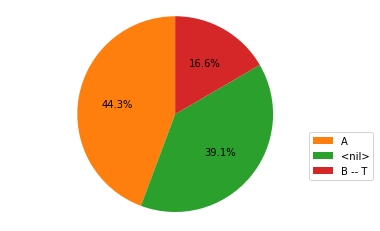

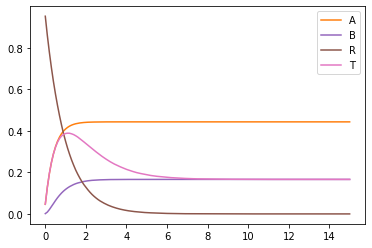

In [4]:
r = model_maboss.run()

# Plot the piechart and trajectories
r.plot_piechart()
r.plot_node_trajectory(until=15)

# save pdf versions of the plots
r._piefig.savefig("single_pie.pdf")
r._ndtraj.savefig("single_traj.pdf")

In [7]:
upp_file = "ToyModelUP.upp"
model_maboss.update_parameters(max_time=1)
model_upmaboss = maboss.UpdatePopulation(model_maboss, upp_file)
ufile = open(upp_file, 'r') 
print(ufile.read())
ufile.close()

$u_Bi u= p[(B) = (1)];
steps = 10;
MaBoSS = MaBoSS;


CPU times: user 496 ms, sys: 627 ms, total: 1.12 s
Wall time: 1min 53s


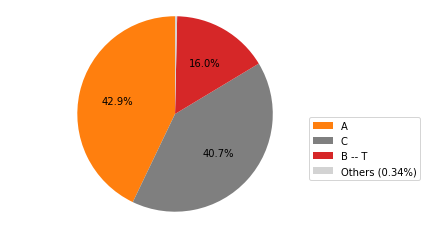

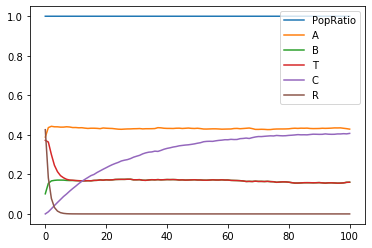

In [8]:

model_upmaboss.setStepNumber(100)
%time ur = model_upmaboss.run()

ur.results[-1].plot_piechart()
ur.results[-1]._piefig.savefig("fast_pop_pie.pdf")

traj = ur.get_nodes_stepwise_probability_distribution()
p = traj.plot()
p.get_figure().savefig("fast_pop_traj.pdf")